Sources for plotting the extracted features: 


https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing

from keras.utils import np_utils
import keras
from keras.models import Model
from keras.models import Sequential
from sklearn.metrics import classification_report
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense


figure_path = module_path + '/figures/small_segment_dataset_plots/'

In [2]:
X_train, y_train_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')

X_train, y_train_= shuffle(X_train, y_train_, random_state = 42)

X_train, X_test, X_val = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test), from_nested_to_2d_array(X_val)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns, X_val.columns = cols, cols, cols

y_train_, y_test_, y_val_ = pd.Series(y_train_), pd.Series(y_test_), pd.Series(y_val_)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

X_train, y_train_= shuffle(X_train, y_train_, random_state = 42)
X_val, y_val_= shuffle(X_val, y_val_, random_state = 42)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], 1)

le = preprocessing.LabelEncoder()

le.fit(y_train_)
num_classes = len(le.classes_)
y_train = le.transform(y_train_)
y_test = le.transform(y_test_)
y_val = le.transform(y_val_)

y_train = np_utils.to_categorical(y_train, num_classes = num_classes)
y_test = np_utils.to_categorical(y_test, num_classes = num_classes)
y_val = np_utils.to_categorical(y_val, num_classes = num_classes)

# Models

In [2]:
batch_size = 100
epochs = 100
input_shape=(X_train.shape[1], 1)


model = Sequential()

model.add(Conv1D(filters=50, kernel_size=6, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=50))
model.add(Conv1D(filters=50, kernel_size=6, activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.25))

#model.add(Dense(500, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
optimizer = keras.optimizers.Nadam(lr=0.001)
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer, metrics=["accuracy"])

NameError: name 'X_train' is not defined

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3995, 50)          350       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 79, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 74, 50)            15050     
_________________________________________________________________
dropout (Dropout)            (None, 74, 50)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3700)              0         
_________________________________________________________________
dense (Dense)                (None, 1500)              5551500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)             

In [8]:
np.linspace(0, 1.001, 11)

array([0.    , 0.1001, 0.2002, 0.3003, 0.4004, 0.5005, 0.6006, 0.7007,
       0.8008, 0.9009, 1.001 ])

In [7]:
np.array([0.9 , 0.99, 0.1001]) < 0.99

array([ True, False,  True])

In [ ]:
def count_region(bottom, top, probs):
    b = (probs <= top) & (probs >= bottom)
    return np.sum(b)

def get_count_cuve(y_prob):
    regions = np.linspace(0, 1, 11)
    counts = []
    for r in regions:
        counts.append(count_region(r, r + 0.1, y_prob))
    return counts

In [8]:
from time import time

start = time()

model.fit(X_train, y_train, epochs = epochs,
          batch_size = batch_size,
          verbose = 1,
         validation_data = (X_val, y_val))


print(f'Time utilized = {time() - start}')

Epoch 1/100
9/9 [==============================] - 3s 252ms/step - loss: 0.6931 - accuracy: 0.5131 - val_loss: 0.6654 - val_accuracy: 0.6000
Epoch 2/100
9/9 [==============================] - 2s 224ms/step - loss: 0.6773 - accuracy: 0.6027 - val_loss: 0.6621 - val_accuracy: 0.6441
Epoch 3/100
9/9 [==============================] - 2s 213ms/step - loss: 0.6631 - accuracy: 0.6135 - val_loss: 0.6445 - val_accuracy: 0.6102
Epoch 4/100
9/9 [==============================] - 2s 208ms/step - loss: 0.6572 - accuracy: 0.6237 - val_loss: 0.6387 - val_accuracy: 0.6271
Epoch 5/100
9/9 [==============================] - 2s 210ms/step - loss: 0.6332 - accuracy: 0.6592 - val_loss: 0.6349 - val_accuracy: 0.6847
Epoch 6/100
9/9 [==============================] - 2s 221ms/step - loss: 0.6381 - accuracy: 0.6603 - val_loss: 0.6168 - val_accuracy: 0.6746
Epoch 7/100
9/9 [==============================] - 2s 235ms/step - loss: 0.6314 - accuracy: 0.6603 - val_loss: 0.6836 - val_accuracy: 0.5492
Epoch 8/100
9

Epoch 59/100
9/9 [==============================] - 2s 232ms/step - loss: 0.0425 - accuracy: 0.9894 - val_loss: 1.2005 - val_accuracy: 0.7051
Epoch 60/100
9/9 [==============================] - 2s 242ms/step - loss: 0.0385 - accuracy: 0.9914 - val_loss: 1.2656 - val_accuracy: 0.6915
Epoch 61/100
9/9 [==============================] - 2s 212ms/step - loss: 0.0404 - accuracy: 0.9864 - val_loss: 1.2849 - val_accuracy: 0.6915
Epoch 62/100
9/9 [==============================] - 2s 206ms/step - loss: 0.0356 - accuracy: 0.9931 - val_loss: 1.3033 - val_accuracy: 0.6949
Epoch 63/100
9/9 [==============================] - 2s 219ms/step - loss: 0.0382 - accuracy: 0.9938 - val_loss: 1.3460 - val_accuracy: 0.7153
Epoch 64/100
9/9 [==============================] - 2s 225ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 1.2973 - val_accuracy: 0.7153
Epoch 65/100
9/9 [==============================] - 2s 223ms/step - loss: 0.0381 - accuracy: 0.9905 - val_loss: 1.2980 - val_accuracy: 0.7220
Epoch 

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       123
           1       0.65      0.69      0.67       114

    accuracy                           0.67       237
   macro avg       0.67      0.67      0.67       237
weighted avg       0.67      0.67      0.67       237



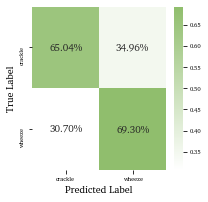

In [9]:
classes = le.classes_

result = model.predict(X_test)
y_pred = np.argmax(result, axis = 1)
y_true = np.argmax(y_test, axis = 1)

f, ax = utility.plot_cm(y_true, y_pred, module_path = module_path, class_names = classes, color_index = 5)

f.savefig(figure_path + f'cm_simpleCNN_2class.pdf', bbox_inches='tight')

print(classification_report(y_true, y_pred))

## 3 classes

In [10]:
X_train, y_train_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')

X_train, y_train_= shuffle(X_train, y_train_, random_state = 42)

X_train, X_test, X_val = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test), from_nested_to_2d_array(X_val)

#y_train_, y_test_, y_val_ = pd.Series(y_train_), pd.Series(y_test_), pd.Series(y_val_)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], 1)

le = preprocessing.LabelEncoder()

le.fit(y_train_)
num_classes = len(le.classes_)
y_train = le.transform(y_train_)
y_test = le.transform(y_test_)
y_val = le.transform(y_val_)

y_train = np_utils.to_categorical(y_train, num_classes = num_classes)
y_test = np_utils.to_categorical(y_test, num_classes = num_classes)
y_val = np_utils.to_categorical(y_val, num_classes = num_classes)

In [14]:
batch_size = 100
epochs = 100
input_shape=(X_train.shape[1], 1)


model = Sequential()

model.add(Conv1D(filters=50, kernel_size=6, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=50))
model.add(Conv1D(filters=50, kernel_size=6, activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.25))

#model.add(Dense(500, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
optimizer = keras.optimizers.Nadam(lr=0.001)
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer, metrics=["accuracy"])

In [15]:
from time import time

start = time()

model.fit(X_train, y_train, epochs = epochs,
          batch_size = batch_size,
          verbose = 1,
         validation_data = (X_val, y_val))

print(f'Time utilized = {time() - start}')

Epoch 1/100
13/13 [==============================] - 4s 246ms/step - loss: 1.0966 - accuracy: 0.3702 - val_loss: 1.0855 - val_accuracy: 0.3916
Epoch 2/100
13/13 [==============================] - 3s 244ms/step - loss: 1.0899 - accuracy: 0.3984 - val_loss: 1.0780 - val_accuracy: 0.4242
Epoch 3/100
13/13 [==============================] - 3s 223ms/step - loss: 1.0810 - accuracy: 0.4354 - val_loss: 1.0714 - val_accuracy: 0.3893
Epoch 4/100
13/13 [==============================] - 3s 212ms/step - loss: 1.0694 - accuracy: 0.4280 - val_loss: 1.0643 - val_accuracy: 0.4336
Epoch 5/100
13/13 [==============================] - 3s 205ms/step - loss: 1.0531 - accuracy: 0.4402 - val_loss: 1.0674 - val_accuracy: 0.4382
Epoch 6/100
13/13 [==============================] - 3s 204ms/step - loss: 1.0506 - accuracy: 0.4391 - val_loss: 1.0605 - val_accuracy: 0.4103
Epoch 7/100
13/13 [==============================] - 3s 218ms/step - loss: 1.0248 - accuracy: 0.4558 - val_loss: 1.0412 - val_accuracy: 0.4429

Epoch 58/100
13/13 [==============================] - 3s 227ms/step - loss: 0.0904 - accuracy: 0.9717 - val_loss: 3.2061 - val_accuracy: 0.4662
Epoch 59/100
13/13 [==============================] - 3s 223ms/step - loss: 0.0893 - accuracy: 0.9716 - val_loss: 3.2213 - val_accuracy: 0.4779
Epoch 60/100
13/13 [==============================] - 3s 213ms/step - loss: 0.0743 - accuracy: 0.9751 - val_loss: 3.2138 - val_accuracy: 0.4709
Epoch 61/100
13/13 [==============================] - 3s 206ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 3.2648 - val_accuracy: 0.4755
Epoch 62/100
13/13 [==============================] - 3s 209ms/step - loss: 0.0773 - accuracy: 0.9790 - val_loss: 3.3517 - val_accuracy: 0.4709
Epoch 63/100
13/13 [==============================] - 3s 224ms/step - loss: 0.0747 - accuracy: 0.9753 - val_loss: 3.3901 - val_accuracy: 0.4639
Epoch 64/100
13/13 [==============================] - 3s 214ms/step - loss: 0.0517 - accuracy: 0.9916 - val_loss: 3.3972 - val_accuracy:

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       111
           1       0.37      0.44      0.40       105
           2       0.51      0.38      0.44       128

    accuracy                           0.47       344
   macro avg       0.48      0.48      0.47       344
weighted avg       0.48      0.47      0.47       344



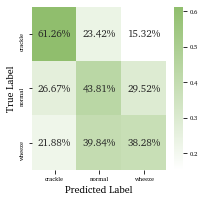

In [16]:
classes = le.classes_

result = model.predict(X_test)
y_pred = np.argmax(result, axis = 1)
y_true = np.argmax(y_test, axis = 1)

f, ax = utility.plot_cm(y_true, y_pred, module_path = module_path, class_names = classes, color_index = 5)

f.savefig(figure_path + f'cm_simpleCNN_3class.pdf', bbox_inches='tight')

print(classification_report(y_true, y_pred))

# Spectrogram CNN 

In [2]:
import librosa
from librosa import display


X_train, y_train_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val_ = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')

X_train, y_train_= shuffle(X_train, y_train_, random_state = 42)

X_train, X_test, X_val = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test), from_nested_to_2d_array(X_val)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns, X_val.columns = cols, cols, cols

y_train_, y_test_, y_val_ = pd.Series(y_train_), pd.Series(y_test_), pd.Series(y_val_)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

X_train, y_train_= shuffle(X_train, y_train_, random_state = 42)
X_val, y_val_= shuffle(X_val, y_val_, random_state = 42)

le = preprocessing.LabelEncoder()

le.fit(y_train_)
num_classes = len(le.classes_)
y_train = le.transform(y_train_)
y_test = le.transform(y_test_)
y_val = le.transform(y_val_)

y_train = np_utils.to_categorical(y_train, num_classes = num_classes)
y_test = np_utils.to_categorical(y_test, num_classes = num_classes)
y_val = np_utils.to_categorical(y_val, num_classes = num_classes)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

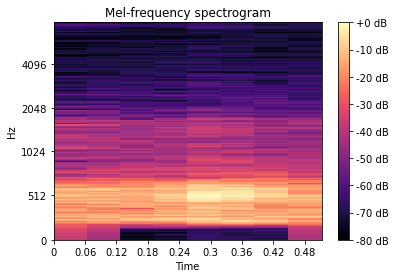

In [19]:
S = librosa.feature.melspectrogram(y=np.hstack(X_train[0]), sr=8000, n_mels=256,
                                    fmax=2000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [17]:
def get_melSpecImg(X):
    X_new = []
    for sample in X:
        S = librosa.feature.melspectrogram(y=sample, sr=8000, n_mels=256, fmax=2000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        X_new.append(S_dB)
    return X_new

In [24]:
X_test_new = np.array(get_melSpecImg(X_test))
X_train_new = np.array(get_melSpecImg(X_train))
X_val_new = np.array(get_melSpecImg(X_val))

In [30]:
from keras import models, layers 


input_shape=(X_train.shape[0],X_train.shape[1],1)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(num_classes, activation='softmax'))

CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy')

In [31]:
history = CNNmodel.fit(X_train_new, y_train, epochs=20, validation_data= (X_val_new, y_val))

Epoch 1/20


ValueError: in user code:

    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/andrine/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 256, 8)
